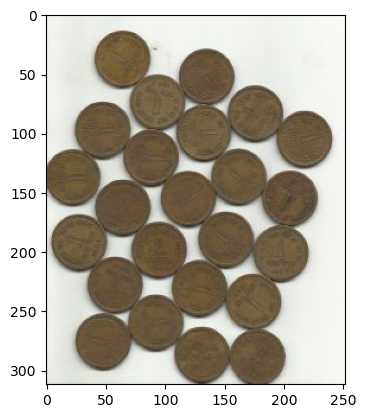

In [82]:
'''
    实现分水岭算法
    参考：https://zhuanlan.zhihu.com/p/67741538
'''
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = cv2.imread('image/work8.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# 查看原图
plt.imshow(img)

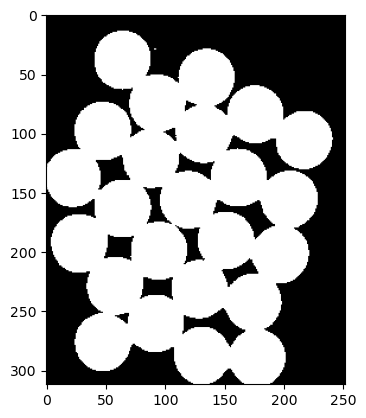

In [83]:
# 使用大津法对图像进行二值化
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap="gray")

In [84]:
# 消除噪音
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

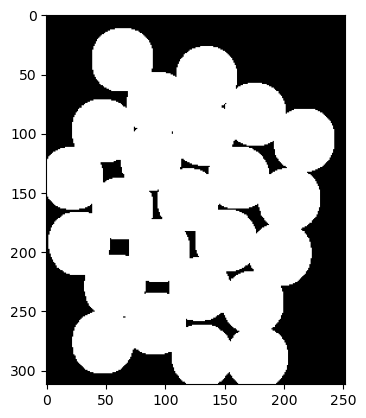

In [85]:
# 确定的背景区域
sure_bg = cv2.dilate(opening, kernel, iterations=2)
plt.imshow(sure_bg, cmap="gray")

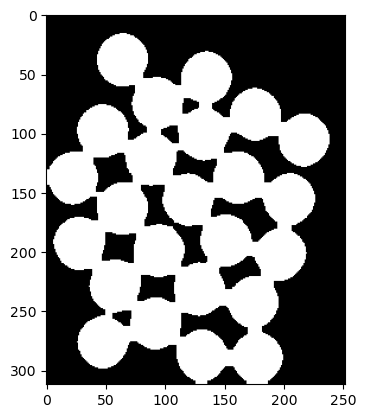

In [86]:
# 确定的前景区域
sure_fg = cv2.erode(opening, kernel, iterations=2)
plt.imshow(sure_fg, cmap="gray")

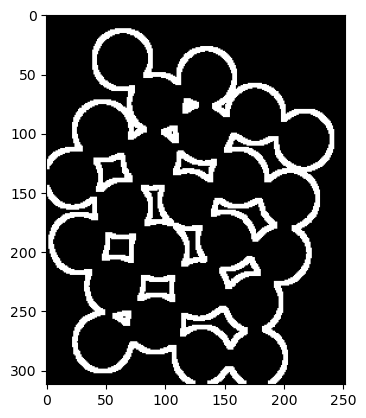

In [87]:
# 不确定的区域
unknown = cv2.subtract(sure_bg, sure_fg)
plt.imshow(unknown, cmap="gray")

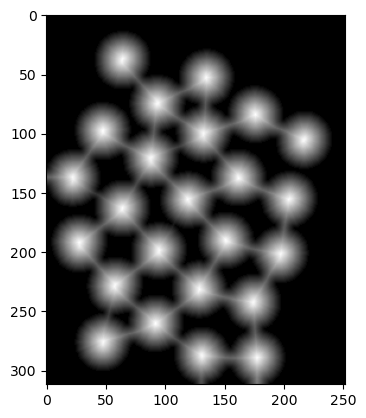

In [88]:
# 距离变换算法
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
plt.imshow(dist_transform, cmap="gray")

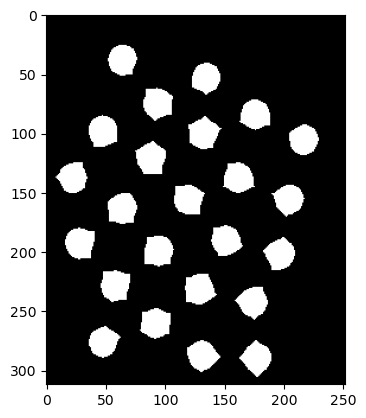

In [89]:
# 归一化
cv2.normalize(dist_transform, dist_transform, 0, 1.0, cv2.NORM_MINMAX)
# 找到确定的前景区域
ret, sure_fg = cv2.threshold(dist_transform, 0.5*dist_transform.max(), 255, 0)
plt.imshow(sure_fg, cmap="gray")

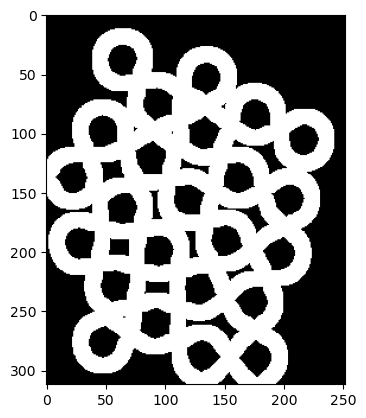

In [90]:
# 找到不确定区域
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown, cmap="gray")

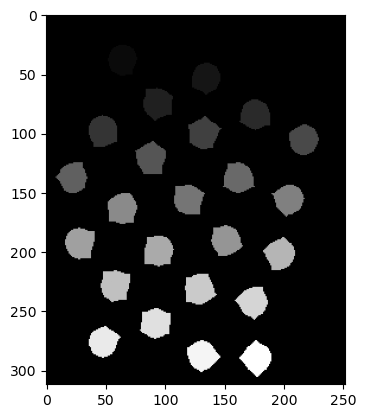

In [91]:
# 标签
ret, markers = cv2.connectedComponents(sure_fg)
plt.imshow(markers, cmap="gray")

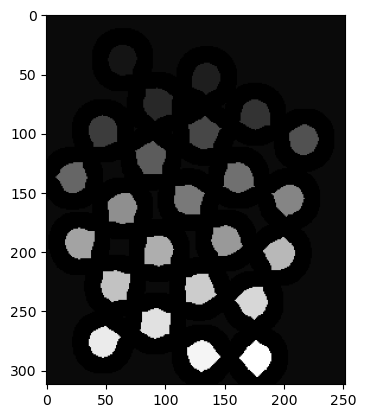

In [92]:
# 所有的标签+1，从而确定背景不是0，而是1
markers = markers+1
# 用0标记未知区域
markers[unknown==255] = 0
plt.imshow(markers, cmap="gray")

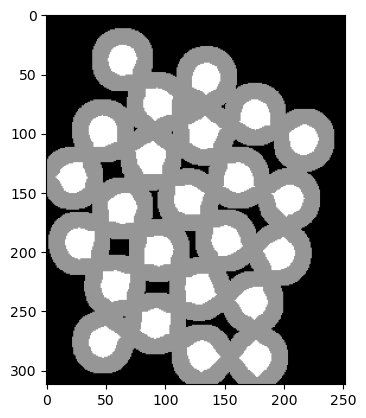

In [93]:
markers_copy = markers.copy()
markers_copy[markers==0] = 150  # 灰色表示背景
markers_copy[markers==1] = 0    # 黑色表示背景
markers_copy[markers>1] = 255   # 白色表示前景

markers_copy = np.uint8(markers_copy)
plt.imshow(markers_copy, cmap="gray")

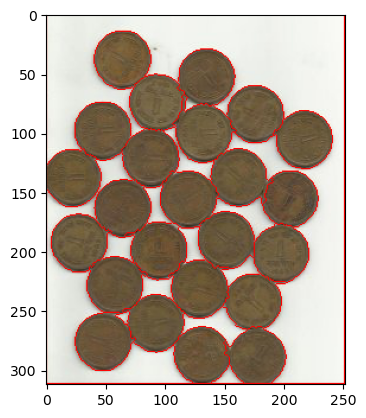

In [96]:
# 使用分水岭算法执行基于标记的图像分割，将图像中的对象与背景分离
markers = cv2.watershed(img, markers)
img[markers==-1] = [0,0,255]  # 将边界标记为红色
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)